In [98]:
%pip install seaborn

In [99]:
# Importing all required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [100]:
# Loading csv file
df= pd.read_csv('Zomato data .csv')

In [101]:
# First 5 rows of dataset
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [102]:
# Last 5 rows of dataset
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [103]:
# Used to count total number of rows and column
df.shape

(148, 7)

In [104]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [105]:
# Used to check null value in data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.3+ KB


In [106]:
# To check type of rate
type('rate')

str

In [107]:
# Converting rate into float and removing denominator "/5"
df['rate']=df['rate'].astype(str).str.replace("/5", "").astype(float).round(1)

In [108]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


<function matplotlib.pyplot.show(close=None, block=None)>

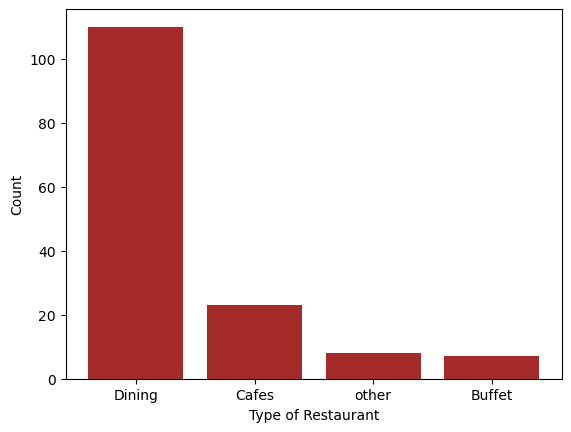

In [109]:
# Bar graph used to count number of times people use different restaurants
plt.bar(list(df['listed_in(type)'].value_counts().keys()), list(df['listed_in(type)'].value_counts()), color='brown')
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.show

Text(0, 0.5, 'Votes')

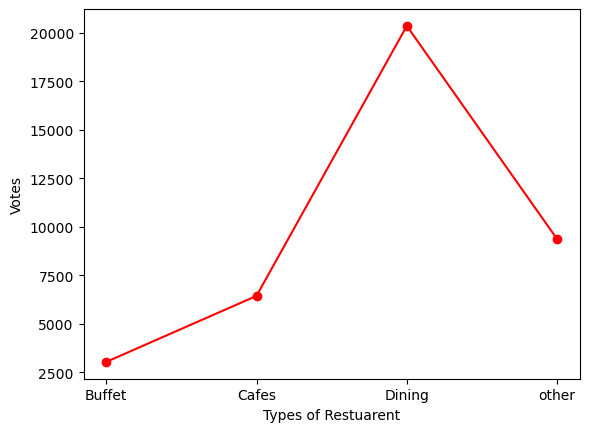

In [110]:
# Line graph to show total number of votes each restaurant get
group_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': group_data})
plt.plot(result, marker="o", color='red')
plt.xlabel('Types of Restuarent')
plt.ylabel('Votes')

<function matplotlib.pyplot.show(close=None, block=None)>

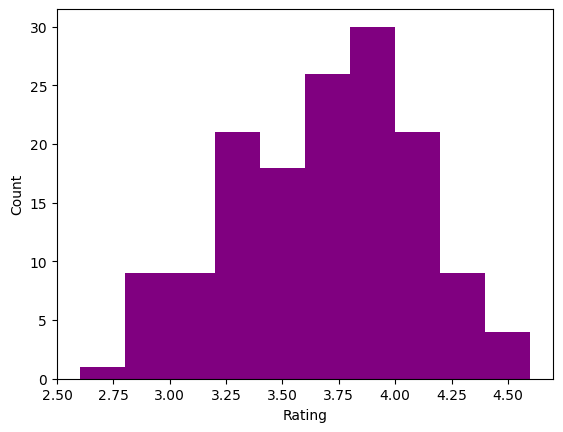

In [111]:
# Histogram plot used for rating distribution
plt.hist(df['rate'], color='purple')
# plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show

Text(0.5, 0, 'Approximate cost for two people')

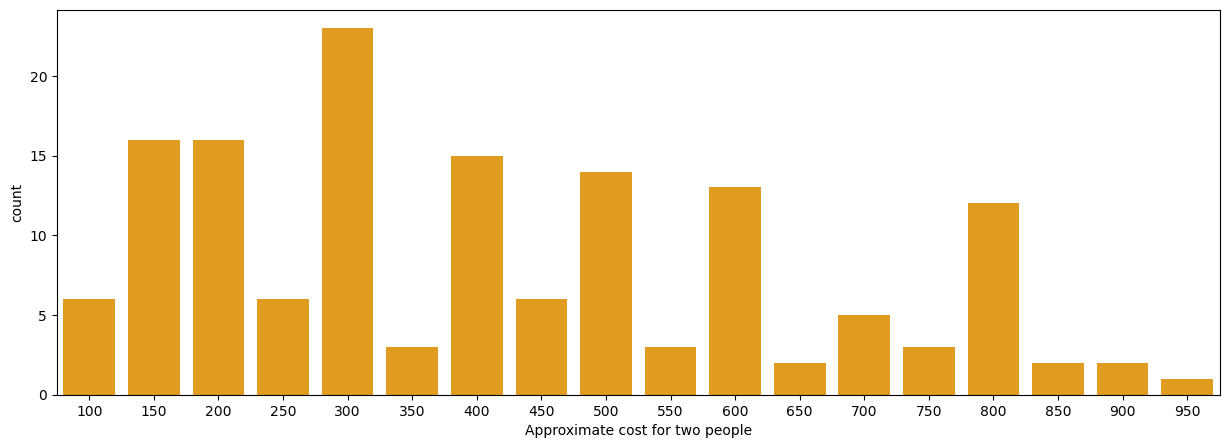

In [112]:
# Count plot is used to count approx cost or two people
plt.figure(figsize=(15,5))
sns.countplot(x='approx_cost(for two people)', data=df, color='orange')
plt.xlabel('Approximate cost for two people')

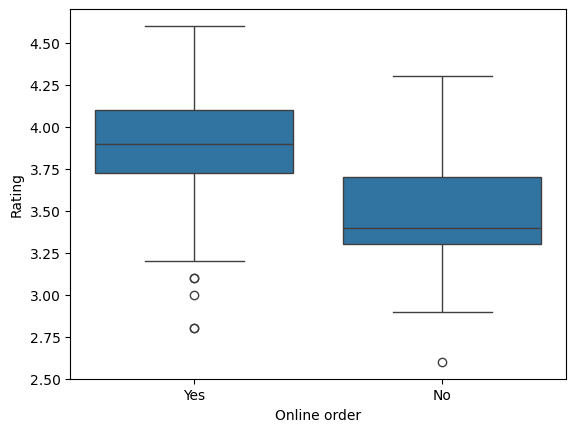

In [113]:
# Box plot is used to compare online and offline rating
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel('Online order')
plt.ylabel('Rating')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

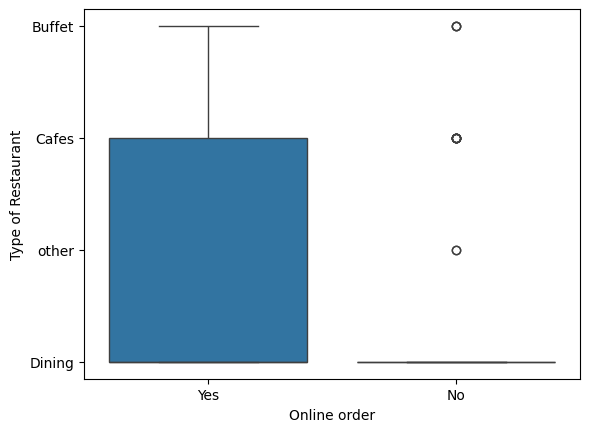

In [114]:
# Box plot is used to compare online and offline order
sns.boxplot(x='online_order', y='listed_in(type)', data=df)
plt.xlabel('Online order')
plt.ylabel('Type of Restaurant')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

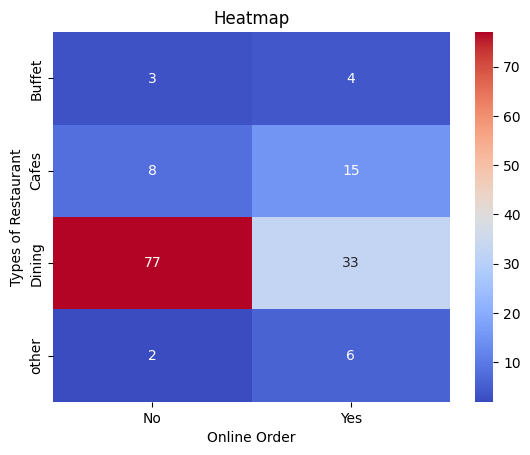

In [115]:
# Heatmap plot is used to compare online and offline order
pt = df.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size')
sns.heatmap(pt, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Types of Restaurant')
plt.show